In [1]:
# Basic imports
import pandas as pd
import matplotlib.pyplot as plt
import talib

# PyNance imports for financial metrics and tech indicators
from pynance.tech import ret, volatility, sma, ema, bollinger

# Optional: set plotting style
plt.style.use("ggplot")
pd.set_option("display.max_columns", None)


ModuleNotFoundError: No module named 'pynance.tech'

In [36]:
import pandas as pd

# Path to your CSV file
csv_path = "data/AAPL.csv"

# Load the CSV into a DataFrame
df_stock = pd.read_csv(csv_path)

# Convert 'Date' column to datetime type
df_stock['Date'] = pd.to_datetime(df_stock['Date'])

# Set 'Date' as the index
df_stock.set_index('Date', inplace=True)

# Keep only the necessary columns
df_stock = df_stock[['Open', 'High', 'Low', 'Close', 'Volume']]

# Check the first few rows
df_stock.head()


,Open,High,Low,Close,Volume
Date,,,,,
2009-01-02,2.575630,2.730385,2.554037,2.721686,746015200
2009-01-05,2.794266,2.884539,2.780469,2.836553,1181608400
2009-01-06,2.877641,2.914229,2.770872,2.789767,1289310400
2009-01-07,2.753477,2.774170,2.706990,2.729484,753048800
2009-01-08,2.712090,2.793666,2.700393,2.780169,673500800


In [40]:
import numpy as np

# Daily simple returns
df_stock['Daily_Return'] = df_stock['Close'].pct_change()

# Daily log returns
df_stock['Log_Return'] = np.log(df_stock['Close'] / df_stock['Close'].shift(1))

# Rolling volatility (20-day annualized)
df_stock['Volatility_20'] = df_stock['Daily_Return'].rolling(window=20).std() * np.sqrt(252)

df_stock.tail()


,Open,High,Low,Close,Volume,Daily_Return,Log_Return,Volatility_20
Date,,,,,,,,
2023-12-22,193.353962,193.581821,191.164647,191.788757,37149600,-0.005548,-0.005563,0.144005
2023-12-26,191.798670,192.076049,191.025969,191.243912,28919300,-0.002841,-0.002845,0.144498
2023-12-27,190.689158,191.689703,189.302247,191.342972,48087700,0.000518,0.000518,0.144240
2023-12-28,192.323710,192.838849,191.362784,191.768951,34049900,0.002226,0.002224,0.142446
2023-12-29,192.085953,192.581275,189.936256,190.728775,42672100,-0.005424,-0.005439,0.144101


In [42]:
import talib
import numpy as np

# Simple Moving Averages
df_stock['SMA_20'] = df_stock['Close'].rolling(window=20).mean()
df_stock['SMA_50'] = df_stock['Close'].rolling(window=50).mean()

# Exponential Moving Averages
df_stock['EMA_20'] = df_stock['Close'].ewm(span=20, adjust=False).mean()
df_stock['EMA_50'] = df_stock['Close'].ewm(span=50, adjust=False).mean()

# Bollinger Bands (20-day window, 2 std)
rolling_mean = df_stock['Close'].rolling(window=20).mean()
rolling_std = df_stock['Close'].rolling(window=20).std()
df_stock['BB_middle'] = rolling_mean
df_stock['BB_upper'] = rolling_mean + (rolling_std * 2)
df_stock['BB_lower'] = rolling_mean - (rolling_std * 2)

# RSI (14) using TA-Lib
df_stock['RSI_14'] = talib.RSI(df_stock['Close'], timeperiod=14)

# MACD using TA-Lib
df_stock['MACD'], df_stock['MACD_signal'], df_stock['MACD_hist'] = talib.MACD(
    df_stock['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

df_stock.tail()


,Open,High,Low,Close,Volume,Daily_Return,Log_Return,Volatility_20,SMA_20,SMA_50,EMA_20,EMA_50,BB_middle,BB_upper,BB_lower,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,,,,,,,
2023-12-22,193.353962,193.581821,191.164647,191.788757,37149600,-0.005548,-0.005563,0.144005,191.856618,183.572859,191.510231,186.389576,191.856618,197.624184,186.089052,54.672784,2.633141,3.235256,-0.602115
2023-12-26,191.798670,192.076049,191.025969,191.243912,28919300,-0.002841,-0.002845,0.144498,192.018094,183.858864,191.484867,186.579942,192.018094,197.506820,186.529367,53.090049,2.304751,3.049155,-0.744404
2023-12-27,190.689158,191.689703,189.302247,191.342972,48087700,0.000518,0.000518,0.144240,192.154308,184.149424,191.471353,186.766728,192.154308,197.418443,186.890174,53.354446,2.029104,2.845145,-0.816041
2023-12-28,192.323710,192.838849,191.362784,191.768951,34049900,0.002226,0.002224,0.142446,192.362839,184.479567,191.499696,186.962893,192.362839,197.178378,187.547299,54.540999,1.823998,2.640915,-0.816918
2023-12-29,192.085953,192.581275,189.936256,190.728775,42672100,-0.005424,-0.005439,0.144101,192.490633,184.814828,191.426275,187.110575,192.490633,196.961302,188.019964,51.121347,1.559539,2.424640,-0.865101


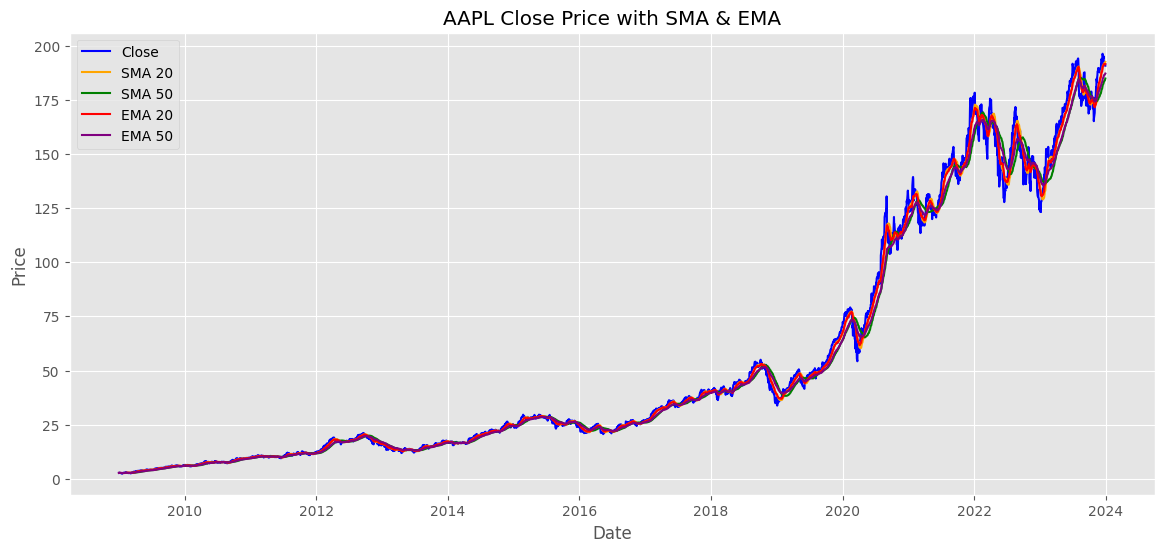

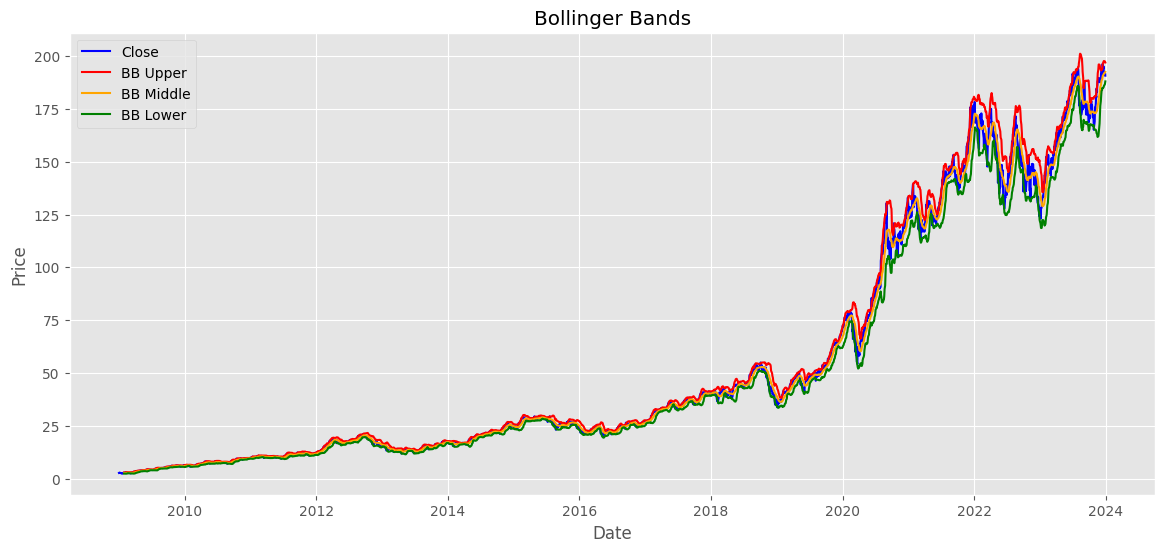

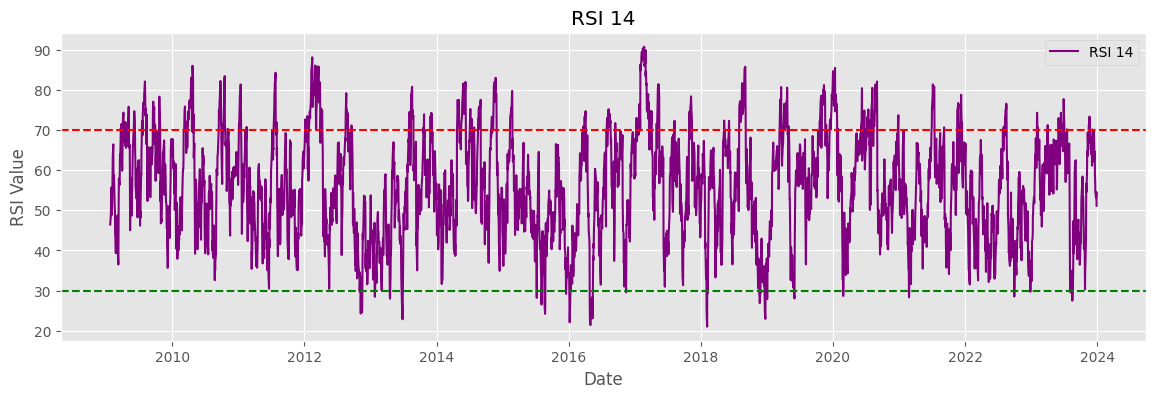

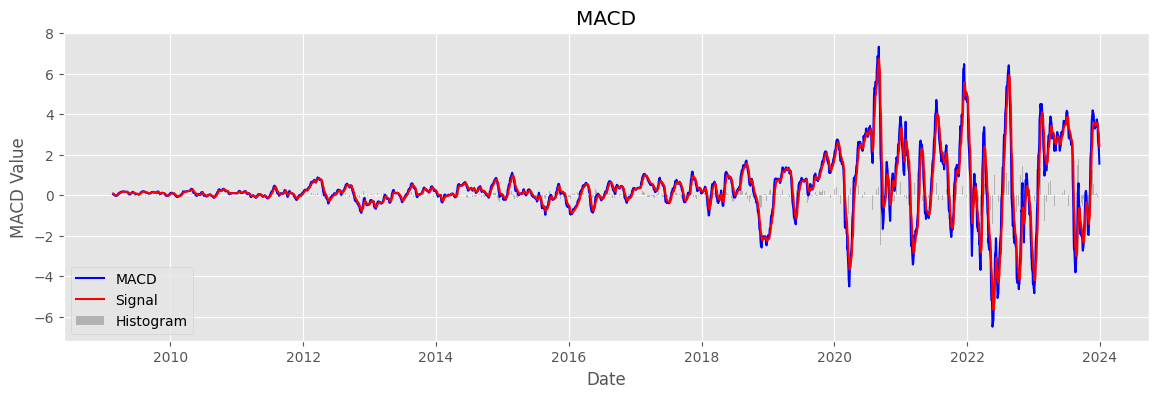

In [43]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# 1️⃣ Plot Close price and SMA/EMA
plt.figure(figsize=(14,6))
plt.plot(df_stock['Close'], label='Close', color='blue')
plt.plot(df_stock['SMA_20'], label='SMA 20', color='orange')
plt.plot(df_stock['SMA_50'], label='SMA 50', color='green')
plt.plot(df_stock['EMA_20'], label='EMA 20', color='red')
plt.plot(df_stock['EMA_50'], label='EMA 50', color='purple')
plt.title("AAPL Close Price with SMA & EMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# 2️⃣ Plot Bollinger Bands
plt.figure(figsize=(14,6))
plt.plot(df_stock['Close'], label='Close', color='blue')
plt.plot(df_stock['BB_upper'], label='BB Upper', color='red')
plt.plot(df_stock['BB_middle'], label='BB Middle', color='orange')
plt.plot(df_stock['BB_lower'], label='BB Lower', color='green')
plt.title("Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# 3️⃣ Plot RSI
plt.figure(figsize=(14,4))
plt.plot(df_stock['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--')   # Overbought
plt.axhline(30, color='green', linestyle='--') # Oversold
plt.title("RSI 14")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.show()

# 4️⃣ Plot MACD
plt.figure(figsize=(14,4))
plt.plot(df_stock['MACD'], label='MACD', color='blue')
plt.plot(df_stock['MACD_signal'], label='Signal', color='red')
plt.bar(df_stock.index, df_stock['MACD_hist'], label='Histogram', color='grey', alpha=0.5)
plt.title("MACD")
plt.xlabel("Date")
plt.ylabel("MACD Value")
plt.legend()
plt.show()


In [44]:
print("Daily Return Statistics:")
print(df_stock['Daily_Return'].describe())

print("\nLog Return Statistics:")
print(df_stock['Log_Return'].describe())

print("\nVolatility (20-day) Statistics:")
print(df_stock['Volatility_20'].describe())


Daily Return Statistics:
count    3773.000000
mean        0.001289
std         0.018010
min        -0.128647
25%        -0.007547
50%         0.001062
75%         0.010770
max         0.119808
Name: Daily_Return, dtype: float64

Log Return Statistics:
count    3773.000000
mean        0.001126
std         0.018010
min        -0.137708
25%        -0.007575
50%         0.001062
75%         0.010712
max         0.113157
Name: Log_Return, dtype: float64

Volatility (20-day) Statistics:
count    3754.000000
mean        0.262732
std         0.113573
min         0.072350
25%         0.190139
50%         0.238726
75%         0.312982
max         1.079532
Name: Volatility_20, dtype: float64


In [45]:
print("""
Financial metrics (daily return, log return, volatility) and technical indicators 
(SMA, EMA, Bollinger Bands, RSI, MACD) were calculated using pandas and TA-Lib. 
Visualizations provide insight into price trends, momentum, and volatility.

Key takeaways:
- SMA/EMA show trend direction
- Bollinger Bands indicate overbought/oversold levels
- RSI confirms momentum extremes
- MACD shows trend changes
- Cumulative returns show overall performance

Next steps:
- Compare multiple stocks
- Backtest strategies
- Create an interactive dashboard with Plotly
""")



Financial metrics (daily return, log return, volatility) and technical indicators 
(SMA, EMA, Bollinger Bands, RSI, MACD) were calculated using pandas and TA-Lib. 
Visualizations provide insight into price trends, momentum, and volatility.

Key takeaways:
- SMA/EMA show trend direction
- Bollinger Bands indicate overbought/oversold levels
- RSI confirms momentum extremes
- MACD shows trend changes
- Cumulative returns show overall performance

Next steps:
- Compare multiple stocks
- Backtest strategies
- Create an interactive dashboard with Plotly

